# AI Lab Assignment H4: Neural Networks

Objective: In this lab, you will implement a digit recognition system using neural networks. You will first use Scikit-learn's MLPClassifier, then build the same network using TensorFlow, and finally compare the two approaches.

### Scenario

You are working at DaciaVision Analytics. Your current project involves developing a smart form reader for digitized documents. You need to build a neural network that can reliably interpret handwritten digits from scanned forms using the **MNIST dataset**: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html.

Your goal: reach at least **96%** accuracy on the test set and understand the trade-offs between using a high-level *general-purpose ML tool (Scikit-learn)* and a *deep learning framework (TensorFlow)*.

Implement a **fully connected feedforward neural network** (no CNNs yet). You must complete the following using both Scikit-learn and TensorFlow to receive full credit.

## Requirements

## 1. Data Preprocessing
- Load the MNIST dataset ( tf.keras.datasets.mnist or sklearn.datasets.load_digits ).
- Normalize pixel values to [0, 1] .
- Flatten input images into 1D vectors if needed.

Let us import some important libraries first.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

import seaborn as sns

import time

Now let us load the dataset and see how it looks.

In [2]:
data_mnist = load_digits()

X = data_mnist.data
y = data_mnist.target.reshape(-1)

print(X)
print(X.shape)
print(y)
print(y.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)
[0 1 2 ... 8 9 8]
(1797,)


We can see that each datapoint is a 8x8 image of a digit, having in total 64 columns and the target y is just a column with values of the target class (0,1,2,3,4,5,6,7,8 or 9). This way, we notice that we do not need to flatted the input data, because every image from the total of 1797 if already a 1D vector.

# Normalizing the pixels

This step is important because:
- we have features which are in a wide range (each pixels ranges from 0 to 255)
- we have to make them matter the same to the ML model
- prevent numerical instability
- normal distribution assumption

Applying **MinMax Normalization**, we will get values in the interval [0,1]. Taking into consideration that the range is not that big (only 255), we will not get values extremely close to each other, so the computations of the model later on will be handled more easily.

In [3]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

X = minmax_scaler.fit_transform(X)
print(X[0])

[0.         0.         0.3125     0.8125     0.5625     0.0625
 0.         0.         0.         0.         0.8125     0.9375
 0.625      0.9375     0.3125     0.         0.         0.1875
 0.9375     0.125      0.         0.6875     0.5        0.
 0.         0.26666667 0.75       0.         0.         0.5
 0.53333333 0.         0.         0.35714286 0.5        0.
 0.         0.5625     0.57142857 0.         0.         0.25
 0.6875     0.         0.0625     0.75       0.4375     0.
 0.         0.125      0.875      0.3125     0.625      0.75
 0.         0.         0.         0.         0.375      0.8125
 0.625      0.         0.         0.        ]


This is the first of X input data, after the normalization. We can see that the values are not too close one from eachother.

## 2. Model Implementation


## A. Scikit-learn version (MLPClassifier)


- Build an MLP with at least:
   - One hidden layer (e.g., 100–128 nodes)
   - ReLU or tanh activation
   - 10-output classes
- Use appropriate max_iter , batch_size , and solver ( adam recommended).
- Track training accuracy and loss (use .loss_curve_ or callbacks).
- Evaluate test accuracy and plot a confusion matrix.


In [4]:
average_accuracy = 0
average_precision = 0     # OVERALL EVALUATION METRICS FOR THE MODEL -> DETAILS LATER 
average_recall = 0
average_f1 = 0

## MLPClassifier parameters

### Hidden layers
- intermediate layers between the input and output layers of the ANN
- process the input using weighted connections and activation functions
- **we have a simple classification task** , so 1 layer is enough
- I chose 128 nodes in the hidden layers because we have to determine quite complex patterns (we have 64 pixel images), so a few pixels per hidden layer are not enough

### ReLU Activation
- keeps patterns of the data, also getting rid of negative values
- neurons stuck with negative inputs stop updating (gradient = 0)
- most popular in modern NNs

### Output Classes
- determined automatically in this case, by the MLPClassifier

### Max_iter
- represents the number of iteration the model needs to converge (i.e., to get to a final result)
- I found that 200 iterations are enough in this case, because, again, the task is not that complicated and we have 128 neurons in the infrastructure, which helps a lot


### Batch size
- how many training samples the network processes before updating its weights during training. It influences both the model's performance and the computational efficiency.
- some mostly used values are 32, 64, 128 ...
- I chose 64 because it puts in balance the computational resources needed and the efficiency of the model



### Adam Optimizer

Adam (short for **Adaptive Moment Estimation**) is one of the most popular and effective optimization algorithms used to train deep learning models. Adam adapts the learning rate for each parameter individually using **first** and **second moments** of the gradients:

- The **first moment** is the **mean** of the gradient (like momentum).
- The **second moment** is the **uncentered variance** of the gradient.

This helps Adam:
- Converge faster
- Handle sparse gradients
  



I would like to train my ANN model in a robust way, so I would like to apply **cross-validation techniques**.

A standard procedure for ANNs is using KFolds, and train the ANN for every fold, separately. This way, we split the data in 5, and every 20% of data is trained at each iteration.

KFolds splits the data randomly and it is fine considering that the **dataset has balanced classes** (see documentation at the beginning) (otherwise we could have used StratifiedKFold).

In [5]:
mlp_time = 0 # for computing how much time the model takes to train

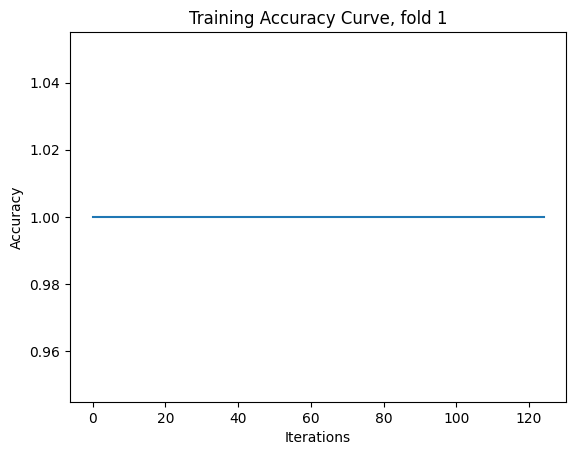

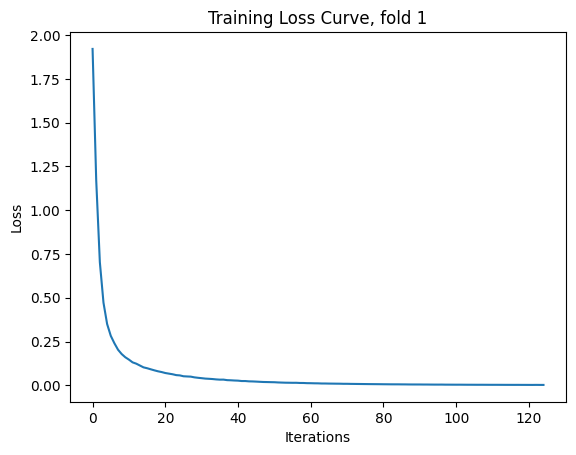

Test Accuracy: 0.9666666666666667
Test Precision: 0.9694338019338019
Test Recall: 0.9666666666666667
Test F1-Score: 0.9668330450628986


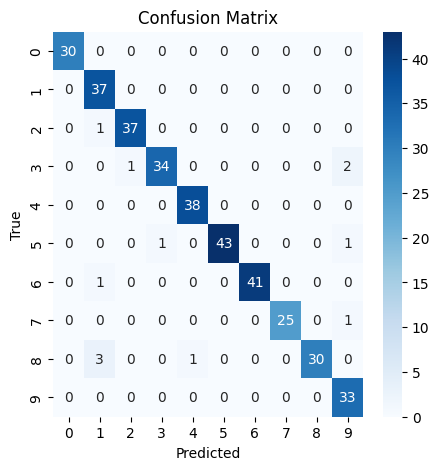

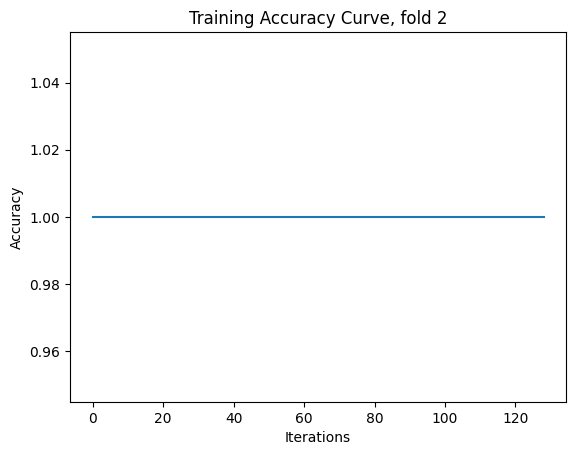

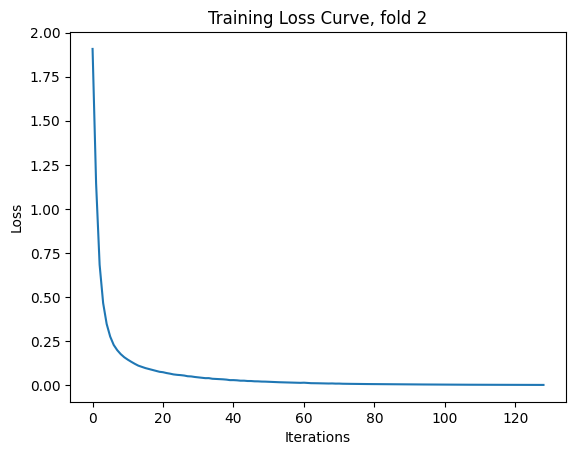

Test Accuracy: 0.9833333333333333
Test Precision: 0.9834854591433538
Test Recall: 0.9833333333333333
Test F1-Score: 0.9833339567586143


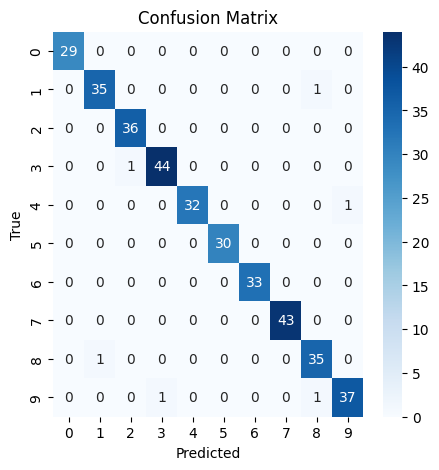

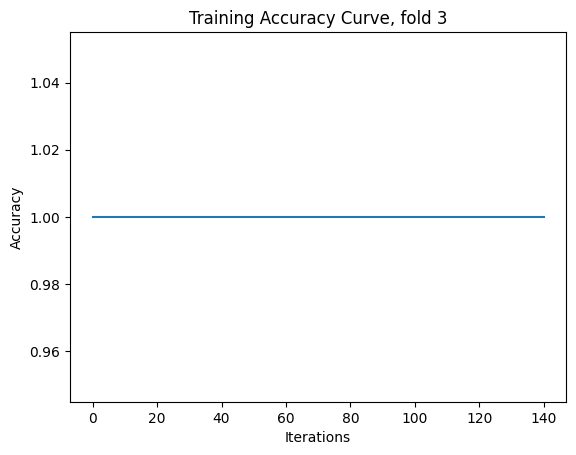

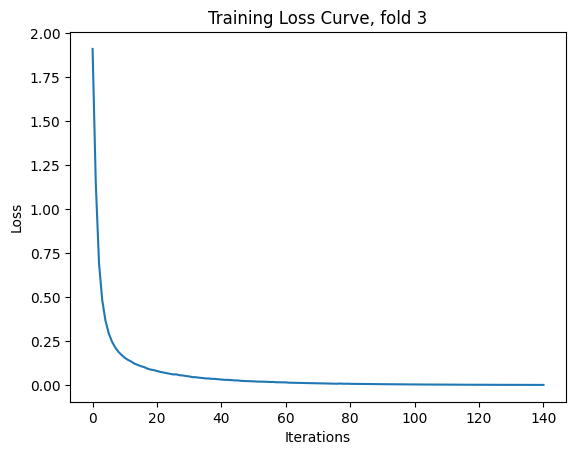

Test Accuracy: 0.9860724233983287
Test Precision: 0.9864638520217743
Test Recall: 0.9860724233983287
Test F1-Score: 0.9861215230018178


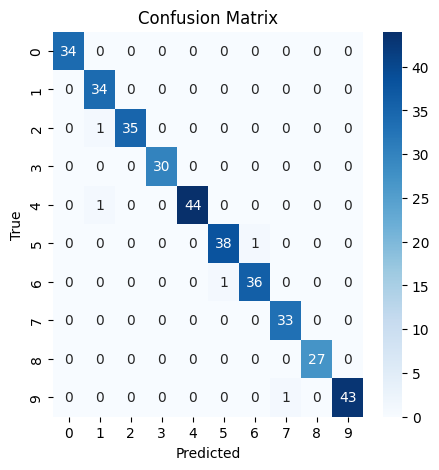

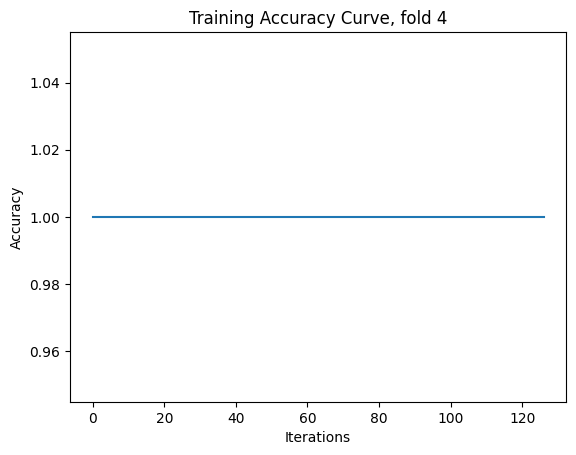

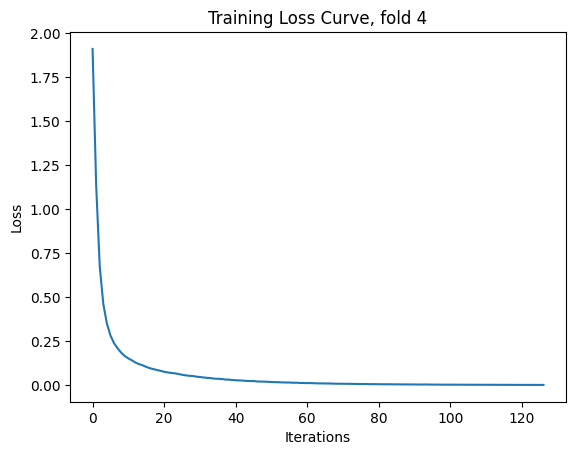

Test Accuracy: 0.9832869080779945
Test Precision: 0.9833341219156322
Test Recall: 0.9832869080779945
Test F1-Score: 0.983234494442558


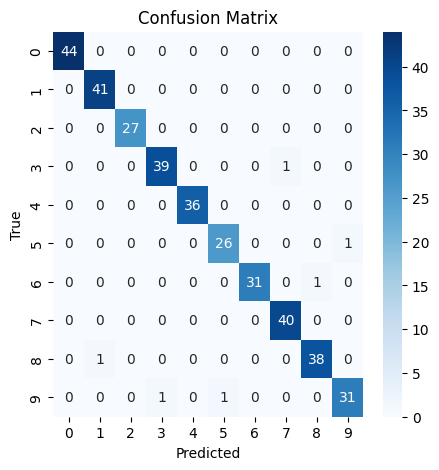

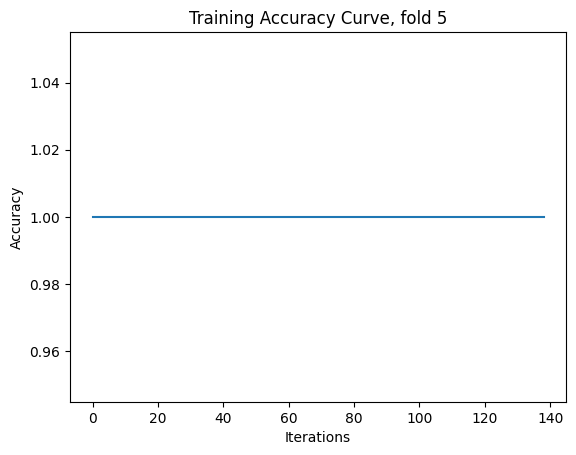

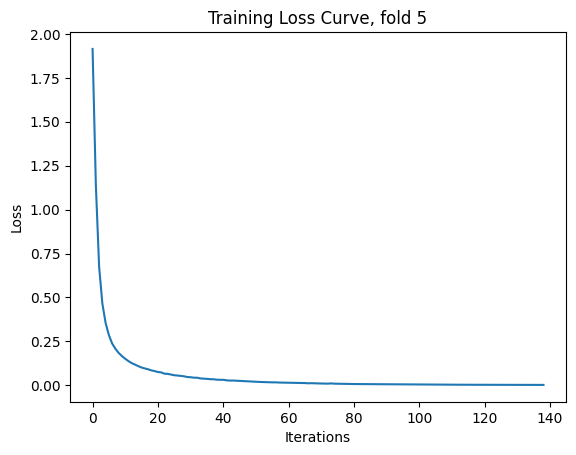

Test Accuracy: 0.9860724233983287
Test Precision: 0.9864537551548644
Test Recall: 0.9860724233983287
Test F1-Score: 0.9861246402527722


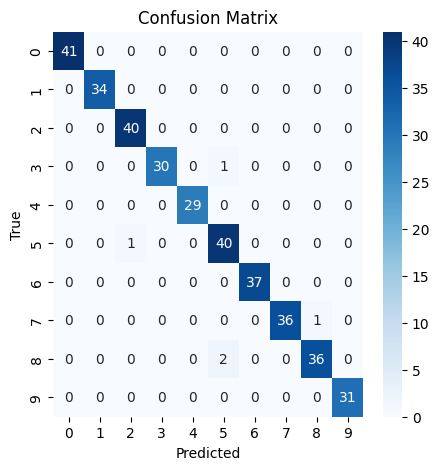

In [6]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=13) # split the data into 5 batches

fold_index=1 # for knowing in which fold we are currently in
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] # splitting the data in train & test
    y_train, y_test = y[train_index], y[test_index] # using KFolds method


    # Model infrastructre + training
    model = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam', max_iter=200,batch_size=32, random_state=13)
    
    start_time = time.time()
    model.fit(X_train, y_train)  # train the model
    end_time = time.time()

    mlp_time += end_time - start_time


    
    # Obtaining the history of training accuracy
    training_accuracy_array=[] # retain the accuracy at every iteration of the taining process of the model
    for epoch in range(model.n_iter_):
        y_train_pred = model.predict(X_train)
        training_accuracy_array.append(accuracy_score(y_train_pred, y_train))


    
    # Potting accuracy history & loss history
    plt.plot(training_accuracy_array) # accuracy history of the model (IN THE TRAINING PHASE)
    plt.title(f'Training Accuracy Curve, fold {fold_index}')
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.show()

    plt.plot(model.loss_curve_) # loss history of the model (IN THE TRAINING PHASE)
    plt.title(f'Training Loss Curve, fold {fold_index}')
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()


    # Predict the test data using the model and evaluate some metrics EXPLAINED BELOW
    y_pred = model.predict(X_test) # get the predicted output

    accuracy_score_test = accuracy_score(y_test, y_pred)
    average_accuracy +=  accuracy_score_test
    print("Test Accuracy:", accuracy_score_test)                                    # compare resulted EVALUATION METRICS OF THE MODEL
    
    precision_score_test = precision_score(y_test, y_pred, average='weighted')
    average_precision += precision_score_test
    print("Test Precision:", precision_score_test)

    recall_score_test = recall_score(y_test, y_pred, average='weighted')
    average_recall += recall_score_test
    print("Test Recall:", recall_score_test)       

    f1_score_test = f1_score(y_test, y_pred, average='weighted')
    average_f1 += f1_score_test
    print("Test F1-Score:", f1_score_test)



    # Confusion matrix - summarizes prediction results.
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data_mnist.target_names, yticklabels=data_mnist.target_names)
    
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


    # Fold index updated
    fold_index += 1
    


## Evaluation Metrics
- **Accuracy**: Proportion of correctly predicted instances.
- **Precision**: Proportion of predicted positives that are actually positive.
- **Recall**: Proportion of actual positives that were correctly predicted.
- **F1 Score**: Harmonic mean of precision and recall.

### Evaluation Metric Formulas:
- Accuracy:
$$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

- Precision:
$$ \text{Precision} = \frac{TP}{TP + FP} $$

- Recall:
$$ \text{Recall} = \frac{TP}{TP + FN} $$

- F1 Score:
$$ \text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $$

Where:
- TP = True Positives
- TN = True Negatives
- FP = False Positives
- FN = False Negatives


Let us see the average metrics computed before.

In [7]:
average_accuracy /= 5
average_precision /= 5     
average_recall /= 5
average_f1 /= 5

print('Overall accuracy', average_accuracy)
print('Overall precision', average_precision)
print('Overall recall', average_recall)
print('Overall f1 score', average_f1)

Overall accuracy 0.9810863509749304
Overall precision 0.9818341980338854
Overall recall 0.9810863509749304
Overall f1 score 0.9811295319037322


Some insights from the previous results:
- the training accuracy curve is linear - this is because the model is converging quickly , because we have a clean and simple dataset (although we may overfit)
- we can see how fast is the convergence is from the loss curve (20th iteration on -> loss close to 0)
- to exclude the overfitting problem, I computed for every fold and also in general 4 metrics for the test data : **accuracy, precision, recall and f1 score**
- these values are close to 1, so **we do not have an overfitting problem**
- the final overall resulted metrics (on the test data) are close to (approx. 0.98), so the model generalizes with 98% accuracy.

## B. TensorFlow version


- Build the same architecture:
  - Use Sequential .
  - Use Dense layers and softmax output.
- Train using variations:
  - validation split
  - Learning rate
  - Batch size
  - Epochs
- Plot training & validation curves for each variation and compare results.
- Evaluate on test set and visualize confusion matrix.

## Variations of TF model training

## Validation split
- splits a percentage of the **training data** for being evaluated on unseen data
- for example, validation_split=0.2 -> 80% training data and 20% for validating

## Learning rate
- Adam optimizer is explianed before
- we can use variatons of the Adam optimizer parameters, but we need to be careful because *too high patrameter(learning rate of Adam) -> risk of overshooting* and *too low patrameter -> risk of slow learning, time-consuming*.

## Batch size
- explained in MLPClassifier

## Nr of Epochs
- how many times the model is trained using the training data
- too high -> risk of overfitting (it memorizes the data, but the model is not able to "learn" new,unseen data.

In [8]:
validations_splits_list = [0.1, 0.2]
learning_rates_list = [0.001, 0.01]
batch_sizes_list = [32,64]
nr_epochs_list = [50, 100]

histories = []

# Split data once (we're not using KFold here for simplicity in plotting)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


for validation_split_option in validations_splits_list:
    for learning_rate_option in learning_rates_list:
        for batch_size_option in batch_sizes_list:
            for nr_epochs_option in nr_epochs_list:
                print(f"Training model with: val_split={validation_split_option}, lr={learning_rate_option}, batch_size={batch_size_option}, epochs={nr_epochs_option}")
                
                  
                model = Sequential([
                    Input(shape=(64,)), # each input sample is a 8x8 image represented as a 1D vector - input 
                    Dense(100, activation='relu'), # hidden layer
                    Dense(10, activation='softmax') # output layer - 10 possible classes , softmax computing probabilities for each class
                ])
            
                model.compile(optimizer=Adam(learning_rate=learning_rate_option),
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])
            
                history = model.fit(X_train, y_train,
                                    validation_split=validation_split_option,    # use the parameters for the fitting
                                    epochs=nr_epochs_option,
                                    batch_size=batch_size_option,
                                    verbose=0)

    
                # Save for plotting
                label = f"val={validation_split_option}, lr={learning_rate_option}, bs={batch_size_option}, ep={nr_epochs_option}"
                histories.append((label, history))


Training model with: val_split=0.1, lr=0.001, batch_size=32, epochs=50
Training model with: val_split=0.1, lr=0.001, batch_size=32, epochs=100
Training model with: val_split=0.1, lr=0.001, batch_size=64, epochs=50
Training model with: val_split=0.1, lr=0.001, batch_size=64, epochs=100
Training model with: val_split=0.1, lr=0.01, batch_size=32, epochs=50
Training model with: val_split=0.1, lr=0.01, batch_size=32, epochs=100
Training model with: val_split=0.1, lr=0.01, batch_size=64, epochs=50
Training model with: val_split=0.1, lr=0.01, batch_size=64, epochs=100
Training model with: val_split=0.2, lr=0.001, batch_size=32, epochs=50
Training model with: val_split=0.2, lr=0.001, batch_size=32, epochs=100
Training model with: val_split=0.2, lr=0.001, batch_size=64, epochs=50
Training model with: val_split=0.2, lr=0.001, batch_size=64, epochs=100
Training model with: val_split=0.2, lr=0.01, batch_size=32, epochs=50
Training model with: val_split=0.2, lr=0.01, batch_size=32, epochs=100
Train

Let's plot the accuracy and loss kept in our histories array for every variantion set.

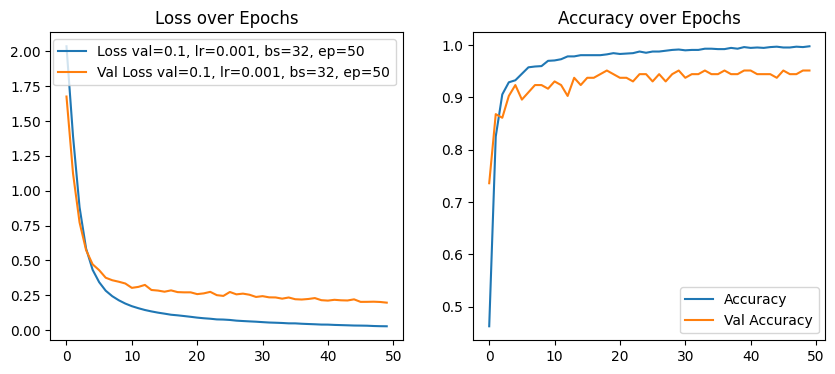

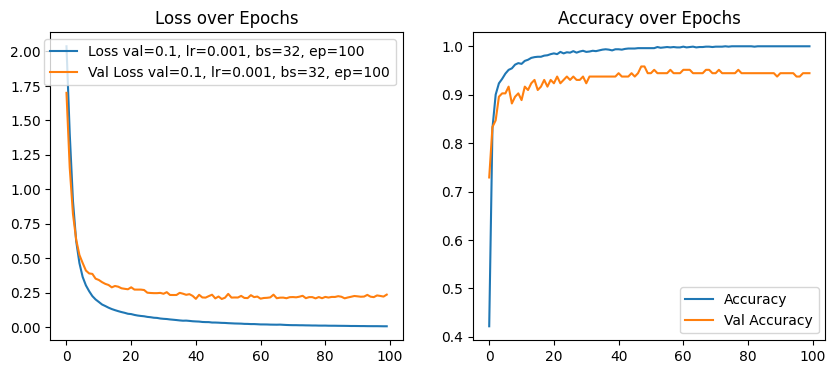

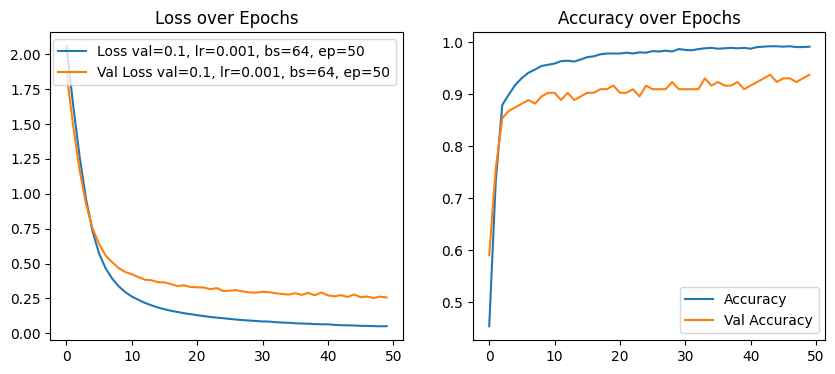

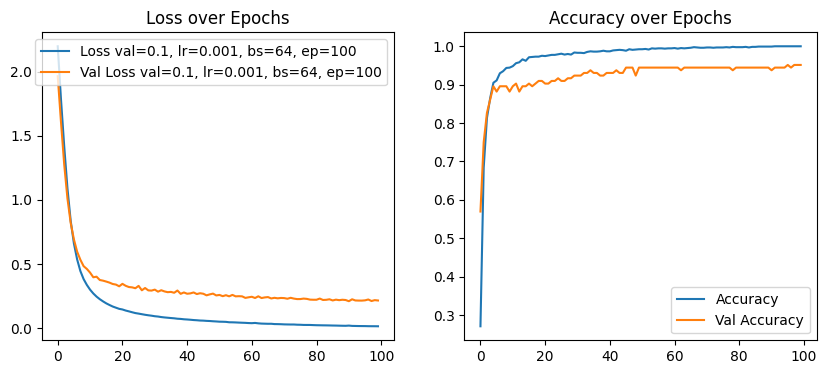

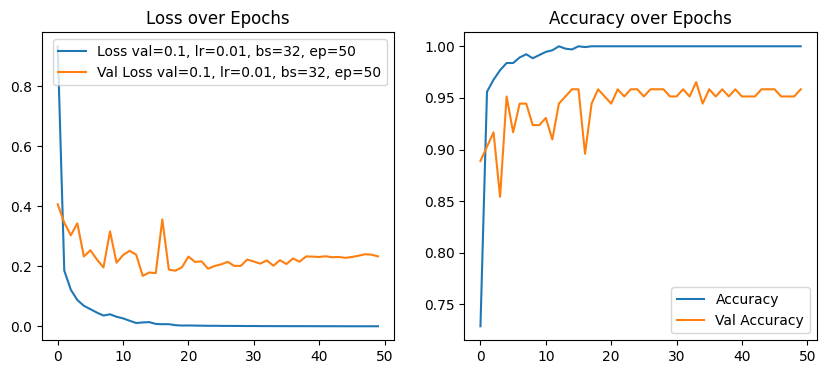

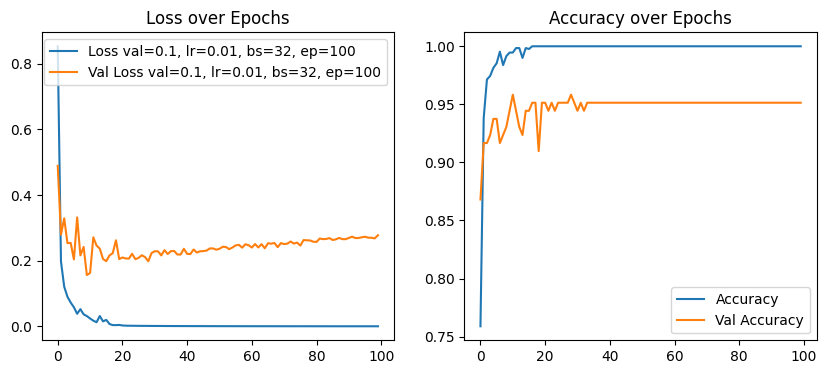

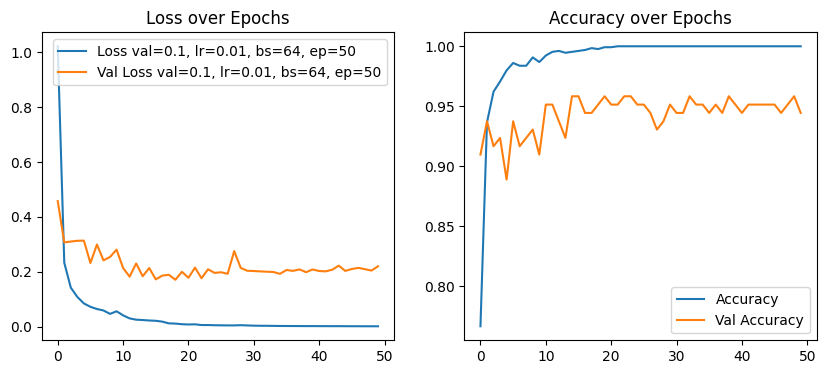

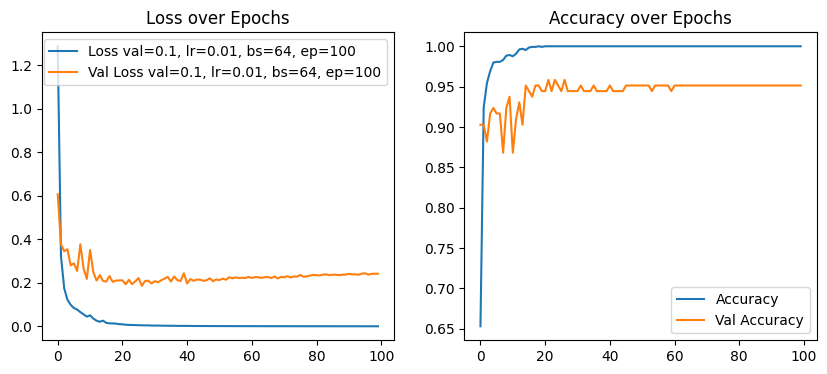

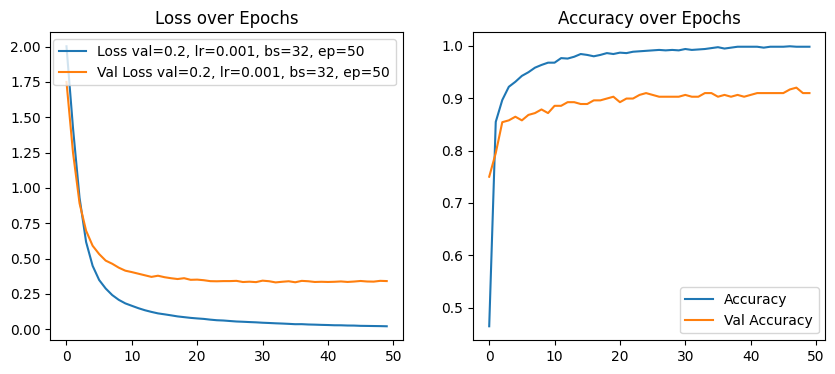

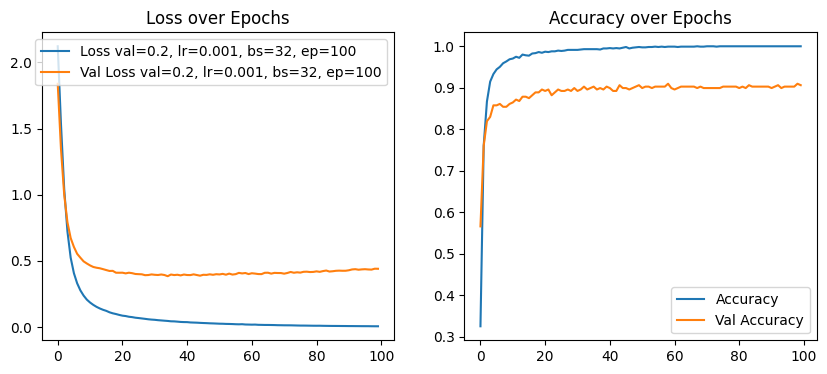

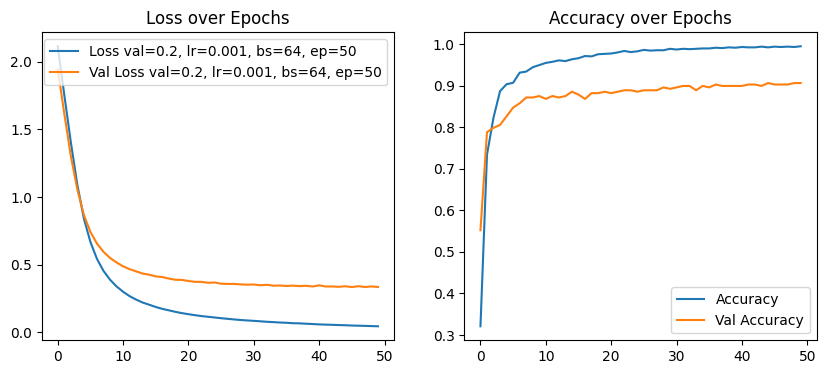

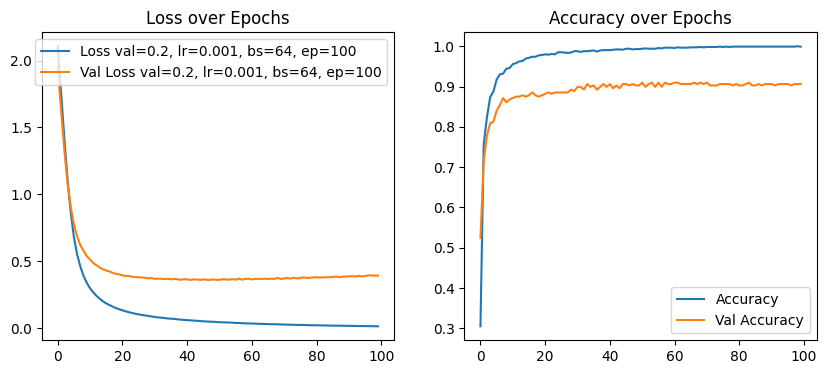

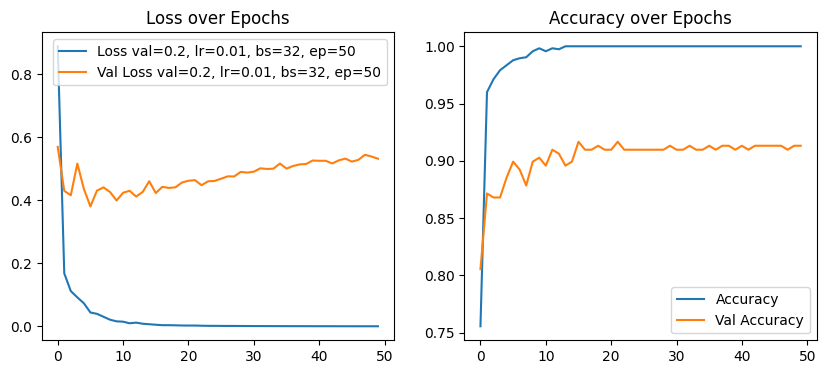

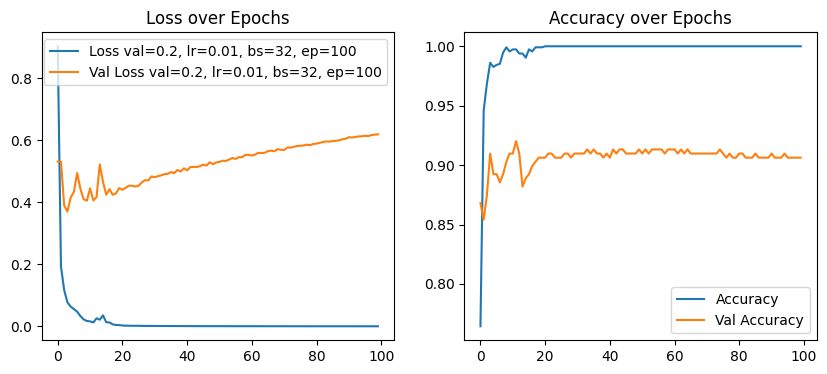

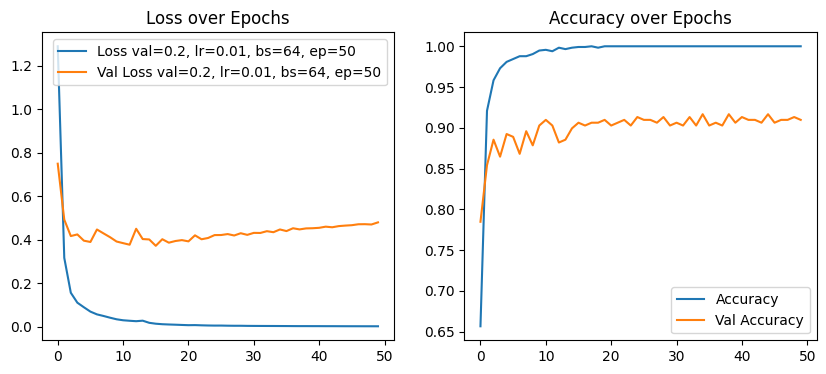

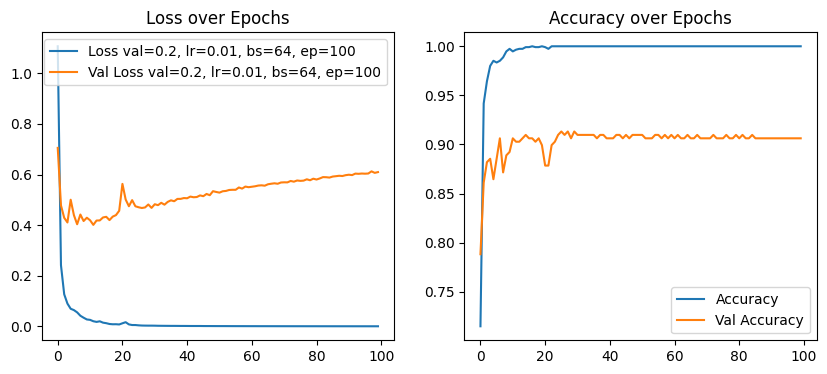

In [9]:
for label, history in histories:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss '+label)
    plt.plot(history.history['val_loss'], label='Val Loss '+label)
    plt.legend()
    plt.title("Loss over Epochs")
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.title("Accuracy over Epochs")
    plt.show()

Now, we will eliminate the models that we notice that do not behave well **considering loss curves**.

- training loss looks good for all the models
- learning rate 0.01 is too big, because models with this learning rate do not behave well on val loss
- validation loss for model ,val=0.001, lr=0.001, bs=32, ep=100 starts increasing at some point, because the model overfits the data (small batches and many iterations). Instead, the model with the same parameters, but ep=50, behaves well, because it does not overfit, due to less iterations/epuchs.

We remained with the models:
- <0.1, 0.001, 32, 50>
- <0.1, 0.001, 32, 100>
  
- <0.1, 0.001, 64, 50>
- <0.1, 0.001, 64, 100>

- <0.2, 0.001, 32, 50>
  
- <0.2, 0.001, 64, 50>
- <0.2, 0.001, 64, 100>

Let us finally analyze **accuracy curves** for the remaining models.

The curves look good for all these models, but we will stick with those with validation splot =0.2, because we want **better generalization**. So we remain with:

- <0.2, 0.001, 32, 50>
  
- <0.2, 0.001, 64, 50>
- <0.2, 0.001, 64, 100>

Taking a closer look, we can see that <0.2, 0.001, 64, 100> overfits a bit , because after the 60th epoch the validation curve starts increasing by a little.
The final choice is <0.2, 0.001, 32, 50>, because it has a better val accuracy curve (closer to 0.9 at the 100th epoch).

Let us now apply KFolds on the selected model and see the accuracy test value and confusion matrices in a similar way with the MLP model.

In [10]:
tf_time =0 # for computing training time

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test Accuracy (Fold 1): 0.9667


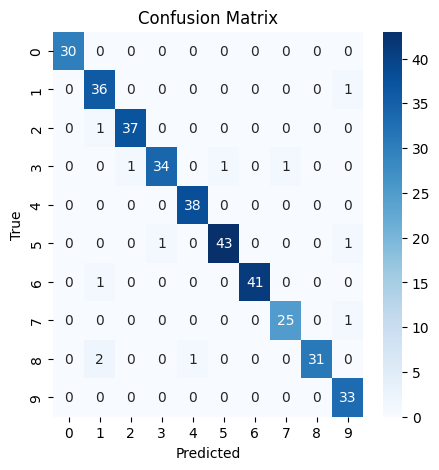

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test Accuracy (Fold 2): 0.9472


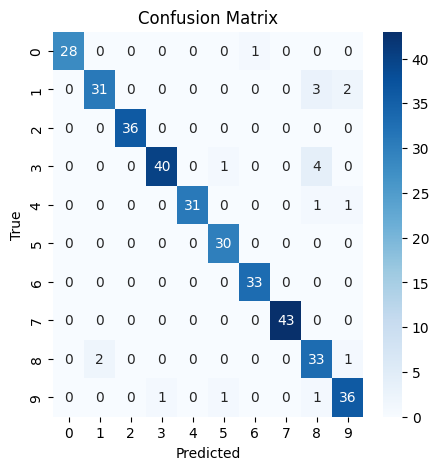

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test Accuracy (Fold 3): 0.9694


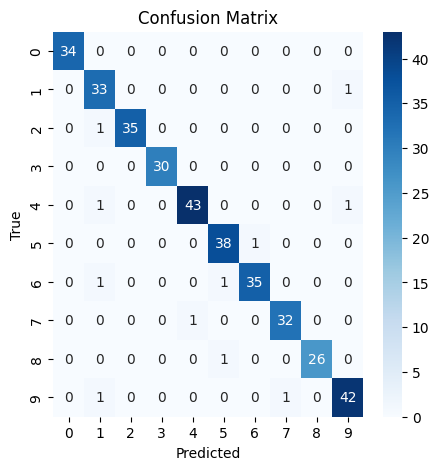

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test Accuracy (Fold 4): 0.9554


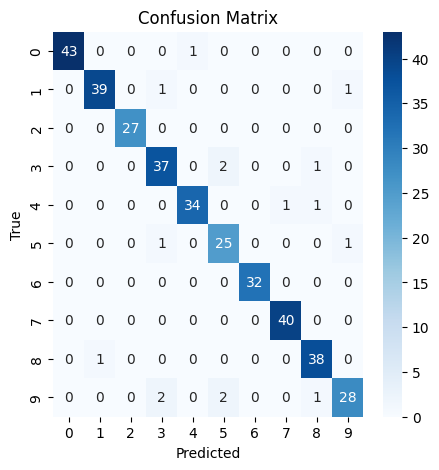

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test Accuracy (Fold 5): 0.9694


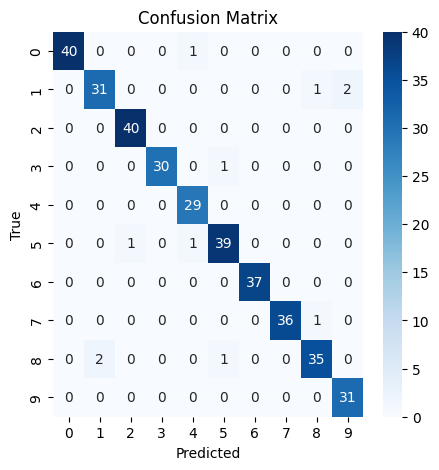

In [11]:
average_accuracy = 0

kf = KFold(n_splits=5, shuffle=True, random_state=13) # split the data into 5 batches

fold_index=1 # for knowing in which fold we are currently in
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] # splitting the data in train & test
    y_train, y_test = y[train_index], y[test_index] # using KFolds method


    model = Sequential([
        Input(shape=(64,)), # each input sample is a 8x8 image represented as a 1D vector - input 
        Dense(100, activation='relu'), # hidden layer
        Dense(10, activation='softmax') # output layer - 10 possible classes , softmax computing probabilities for each class
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    start_time = time.time()
    history = model.fit(X_train, y_train,
                        validation_split=0.2,    # use the parameters for the fitting
                        epochs=50,
                        batch_size=32,
                        verbose=0)
    end_time = time.time()

    tf_time += end_time - start_time

    
    # Predict on test data
    y_pred = np.argmax(model.predict(X_test), axis=1) # the index with the highest probability from the prediction of the NN
    accuracy_score_test = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy (Fold {fold_index}): {accuracy_score_test:.4f}")
    average_accuracy += accuracy_score_test

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    fold_index += 1
    


In [12]:
average_accuracy /= 5
print('Overall accuracy', average_accuracy)

Overall accuracy 0.9616078613432375


## 3. Performance Comparison
- Compare the test accuracy, training time, and model flexibility between the two implementations.
- Discuss:
  - Which one is easier to implement?
  - Which gives better performance? Why?

**MLP** test accuracy: 0.981

**TensorFlow** test accuracy: 0.960   

- so clearly MLP has a better test accuracy.

In [17]:
print(f'MLPClassifier model training time: {mlp_time:.2f}')
print(f'TensorFlow model training time: {tf_time:.2f}')

MLPClassifier model training time: 8.26
TensorFlow model training time: 16.29


- so clearly MLP has better training time

I think that MLPClassifier is more flexible, because we do not need to specify the input and output layer sizes, so our current architecture can be applied for other classifications tasks (e.g. we may have 7 classes to predict, we do not need to change the implementation of the model).

Also, being a built-in classifier, it clearly is better optimized and can generalize on other datasets.

I think MLPClassifier is easier to implement, because it has less parameters and we do not have to think at **metric=?**, **validation_split=?**, **input and output layers**, the drawback being that we need to use KFolds to be consistent.

On the other hand, having **validation_split** for TF, KFolds is not necessary, the model already splitting the data into training data and validation data.

Taking into consideration training time and test accuracy, MLPClassifier has better performance, because, again, it is a built-in model that is fine-tuned.